In [13]:
#Import necessary packages
"""
Identify text in an image, I am using MNIST dataset,
every image is 28x28 pixels
Using method nn form pytorch
"""

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
#import helper
import matplotlib.pyplot as plt


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])


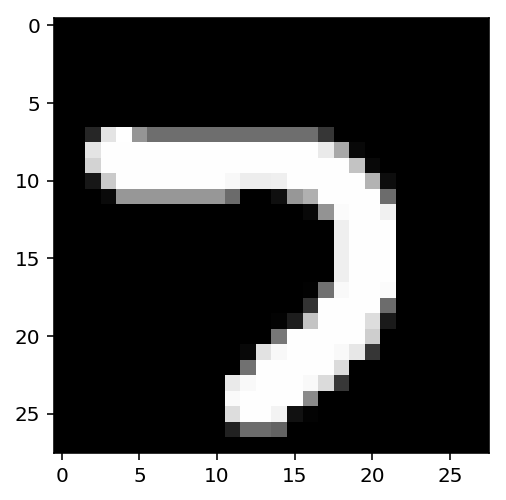

In [14]:
#this dataset is available in torchvision package
from torchvision import datasets, transforms
#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
#Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#for image, label in trainloader:
 #   print(image)
dataiter = iter(trainloader)
images, label = dataiter.next()
print(type(images))
print(images.shape)

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [17]:
"""
This kind of networks are called fully-connected(Each unit in one layer is connected to each unit in the next layer)
so the input to each layer must be a one-dimensional vector
image is 28x28 I have to convert it to 1D vector = 784 -> 64 x 784
FLATTENING 2D in 1D vector
"""

def activation_sigmoid(x):
    return 1 / (1 + torch.exp(-x))

torch.manual_seed(7)
n_input = 784
n_output = 10
n_hidden = 256
n_size = 64

features = images.view(images.shape[0], -1)

W1 = torch.rand((n_input, n_hidden))
B1 = torch.randn( n_hidden)
o_hidden = activation_sigmoid(torch.mm(features, W1) + B1)

W2 = torch.rand((n_hidden, n_output))
B2 = torch.randn(n_output)
o_output = torch.mm(o_hidden, W2) + B2

o_output.shape


#dim = 0 takes the sum across the rows while dim = 0 takes sum across the columns
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

print(softmax(features))
print(torch.sum(softmax(features), dim = 1))


tensor([[0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008],
        [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
        [0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008],
        ...,
        [0.0008, 0.0008, 0.0008,  ..., 0.0008, 0.0008, 0.0008],
        [0.0006, 0.0006, 0.0006,  ..., 0.0006, 0.0006, 0.0006],
        [0.0010, 0.0010, 0.0010,  ..., 0.0010, 0.0010, 0.0010]])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Using nn from Pytorch

In [3]:
#inheriting from nn.Module, it's mandatory
from torch import nn

class Network(nn.Module):
    
    def __init__(self):
        super().__init__() #this create a class
        
#       nn.Linear
#       Create a module for a linear transformation xW + b
#       The module automatically creates the weight and bias tensors which we'll use in the forward method 
#       methods to access : net.hidden.weight and net.hidden.bias
        self.hidden = nn.Linear(784, 256) 
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1) #calculates softmax across the columns.
        
        #must have a forward method defined
        def forward(self, x):
            # Pass the input tensor through each of our operations
            x = self.hidden(x)
            x = self.sigmoid(x)
            x = self.output(x)
            x = self.softmax(x)
            
            return x

# Create the network and look at it's text representation
model = Network()
model.softmax

Softmax()

### or Using nn.funcional from Pytorch

In [4]:
import torch.nn.functional as F

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x))
        
        return x

### Building Network

<img src="assets/mlp_mnist.png" width=600px>

In [9]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        
        return x

model = Network()
model


Parameter containing:
tensor([[ 0.0347, -0.0331,  0.0163,  ..., -0.0073, -0.0241,  0.0288],
        [-0.0348,  0.0260,  0.0259,  ..., -0.0343,  0.0220, -0.0321],
        [-0.0126,  0.0044, -0.0252,  ..., -0.0140,  0.0154, -0.0328],
        ...,
        [-0.0139,  0.0131, -0.0115,  ..., -0.0161, -0.0121, -0.0161],
        [-0.0329,  0.0072,  0.0145,  ...,  0.0196,  0.0099,  0.0252],
        [ 0.0259,  0.0296,  0.0280,  ..., -0.0046,  0.0258, -0.0311]],
       requires_grad=True)
Parameter containing:
tensor([-0.0264,  0.0150,  0.0254,  0.0124, -0.0274, -0.0197,  0.0209,  0.0351,
        -0.0238,  0.0004,  0.0231, -0.0340, -0.0151, -0.0102, -0.0044,  0.0263,
         0.0237, -0.0353,  0.0332,  0.0188, -0.0286, -0.0083, -0.0031,  0.0166,
        -0.0023,  0.0252,  0.0243,  0.0102,  0.0145, -0.0190,  0.0238,  0.0346,
         0.0148,  0.0217,  0.0044, -0.0141,  0.0276, -0.0018, -0.0185,  0.0232,
        -0.0357,  0.0213, -0.0064, -0.0198,  0.0214,  0.0169, -0.0064, -0.0335,
        -0.0225

tensor([[ 0.0135,  0.0075, -0.0104,  ..., -0.0060,  0.0241, -0.0055],
        [-0.0047, -0.0109,  0.0045,  ...,  0.0168,  0.0240, -0.0024],
        [ 0.0100, -0.0025, -0.0106,  ..., -0.0125, -0.0035, -0.0051],
        ...,
        [-0.0131, -0.0057, -0.0022,  ..., -0.0040,  0.0082,  0.0029],
        [-0.0041, -0.0001,  0.0075,  ...,  0.0020,  0.0003, -0.0251],
        [ 0.0168, -0.0041, -0.0103,  ..., -0.0205,  0.0175, -0.0093]])

In [10]:

# The weights are automatically initialized for you
print(model.fc1.weight)
print(model.fc1.bias)

# Modify the tensor in place
# Set bias to all zeros
# These are autograd Variables
model.fc1.bias.data.fill_(0)

# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

Parameter containing:
tensor([[ 0.0135,  0.0075, -0.0104,  ..., -0.0060,  0.0241, -0.0055],
        [-0.0047, -0.0109,  0.0045,  ...,  0.0168,  0.0240, -0.0024],
        [ 0.0100, -0.0025, -0.0106,  ..., -0.0125, -0.0035, -0.0051],
        ...,
        [-0.0131, -0.0057, -0.0022,  ..., -0.0040,  0.0082,  0.0029],
        [-0.0041, -0.0001,  0.0075,  ...,  0.0020,  0.0003, -0.0251],
        [ 0.0168, -0.0041, -0.0103,  ..., -0.0205,  0.0175, -0.0093]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

tensor([[-0.0087, -0.0095, -0.0132,  ..., -0.0116, -0.0126, -0.0165],
        [ 0.0033, -0.0080,  0.0017,  ...,  0.0136,  0.0029,  0.0073],
        [-0.0045, -0.0169, -0.0010,  ..., -0.0121,  0.0081,  0.0076],
        ...,
        [-0.0026, -0.0049,  0.0120,  ...,  0.0064,  0.0034,  0.0226],
        [ 0.0191,  0.0066, -0.0137,  ...,  0.0034, -0.0066, -0.0051],
        [ 0.0061,  0.0125, -0.0034,  ...,  0.0056, -0.0089,  0.0089]])

torch.Size([1, 784])


/Users/taniaincio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


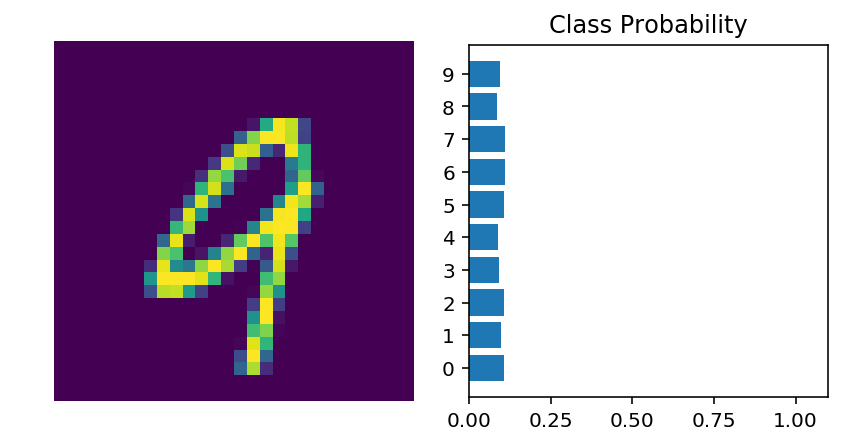

In [17]:
# Grab some data 
import helper
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
print(images[img_idx,:].shape)

ps = model1.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)